In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing the neccessary libraries

In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing the dataset

In [8]:
df=pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Data Exploration

### Data Description

- **TV:** This column represents the amount of money spent on advertising through TV channels. It indicates the financial investment in television advertising for each instance.

- **Radio:** This column represents the advertising expenditure on radio. It shows how much money is allocated to radio advertising for each case.

- **Newspaper:** This column represents the advertising expenditure in newspapers. It indicates the financial investment in newspaper advertising for each instance.

- **Sales:** This column represents the sales generated as a result of the advertising expenditures in TV, Radio, and Newspaper. It shows the outcome variable that is being analyzed or predicted.

The dataset contains information about advertising expenditures across different channels (TV, Radio, Newspaper) and the corresponding sales outcomes. The goal is to analyze the relationship between advertising spending and sales, potentially building a predictive model or understanding which advertising channels contribute more to sales.

In [9]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
print(f"The shape of the data is: {df.shape}")
print(f"The size of the data is: {df.size}")

The shape of the data is: (200, 4)
The size of the data is: 800


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
if df.duplicated().sum() > 0:
    print(f"There are {df.duplicated().sum()} duplicated rows in the dataset.")
else:
    print("There are no duplicated rows in the dataset.")

There are no duplicated rows in the dataset.


In [14]:
if df.isnull().sum().any():
    print(f"There are {df.isnull().sum().sum()} null values in the dataset.")
else:
    print("There are no null values in the dataset.")

There are no null values in the dataset.


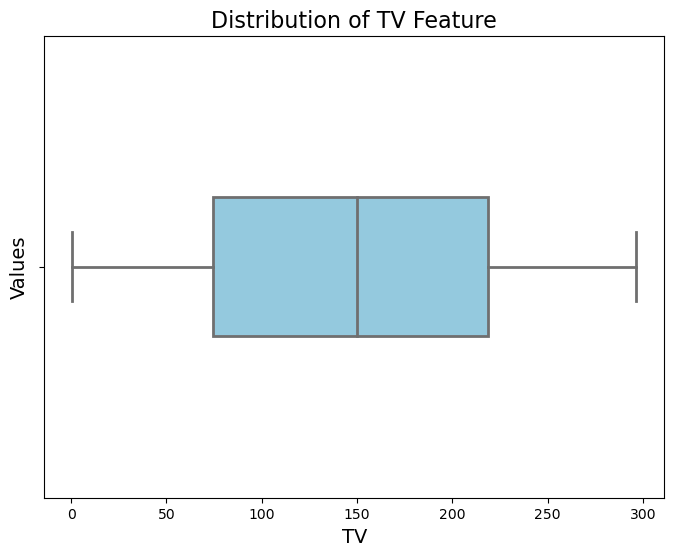

In [15]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df["TV"], color='skyblue', width=0.3, linewidth=2)

# Add title and labels
plt.title("Distribution of TV Feature", fontsize=16)
plt.xlabel("TV", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Show the plot
plt.show()

# Fitting Regression Model to the data

In [16]:
x_all=df.iloc[:,0:3]
x=df.iloc[:,[0]]
y=df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.size,x_test.size

(140, 60)

In [18]:
from sklearn.linear_model import LinearRegression

# Assuming x_train is a pandas Series and y_train is a pandas Series
x_train_reshaped = x_train.values
y_train_reshaped = y_train.values  # No need to reshape y_train as it's the target variable

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train_reshaped, y_train_reshaped)

LinearRegression()

In [19]:
x_test_reshaped=x_test.values.reshape(-1,1)
y_pred=model.predict(x_test_reshaped)
residual=y_test-y_pred

Linear regression, a statistical method for modeling the relationship between a dependent variable and one or more independent variables, relies on several key assumptions. These assumptions are crucial for ensuring the validity and reliability of the model's results.

# 1) Linearity

> This assumption states that the relationship between the dependent variable and the independent variables is linear. In simpler terms, the change in the dependent variable should be proportional to the change in the independent variable(s). This can be visualized as a straight line in a scatter plot of the data.

C:\Users\sugas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sugas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


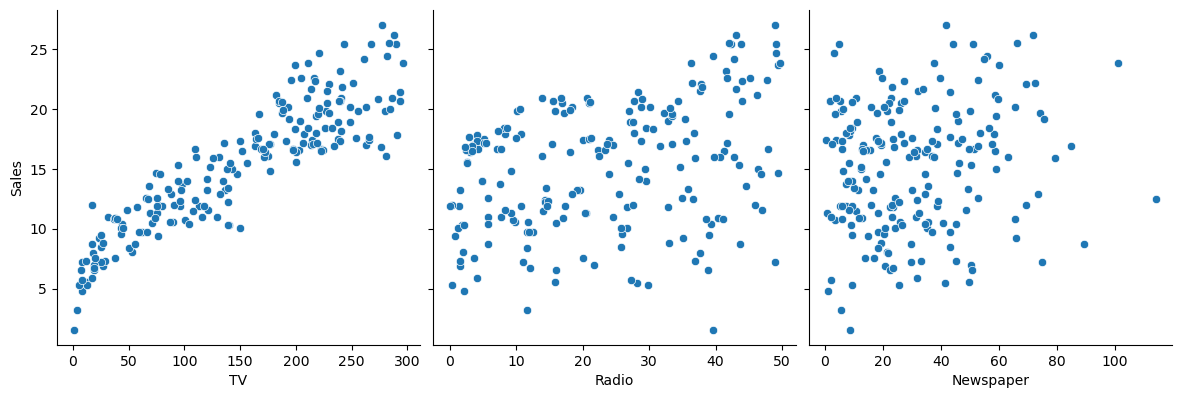

In [20]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales',
                               height=3,size=4, aspect=1, kind='scatter', markers='o')

Based on the preceding analysis, it is evident that there exists a linear correlation between the amount allocated to TV advertising expenditure and sales. Consequently, we can move forward with the application of linear regression.

# 2) Multicollinearity

> This assumption states that the independent variables are not highly correlated with each other. Multicollinearity occurs when there is a strong linear relationship between two or more independent variables. This can lead to unreliable estimates of the coefficients and make it difficult to interpret the results of the regression analysis.

### Methods to detect the multicollinearity

**i) Variance Inflation Factor (VIF)** is a measure that quantifies the extent of multicollinearity in a set of independent variables within a regression model.

**Interpretation:**

A VIF of 1 indicates no multicollinearity.
VIF greater than 1 suggests the presence of multicollinearity.
Generally, a VIF above 5 or 10 is considered high, indicating a problematic level of multicollinearity.



In [21]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
vif=[]
for i in range (x_all.shape[1]):
    vif.append(variance_inflation_factor(x_all,i))

In [23]:
pd.DataFrame({'vif':vif},index=df.columns[0:3]).T

,TV,Radio,Newspaper
vif,2.486772,3.285462,3.055245


* The VIF values are all below 5, which indicates moderate multicollinearity.
Generally, VIF values around 3 or 4 might raise some concern, but they are not excessively high.

* While these VIF values suggest some level of multicollinearity, they may not be severe enough to cause significant issues with interpretation.

**ii) Correlation Heatmap**

> The correlation heatmap is a useful tool for assessing multicollinearity among predictor variables in a dataset. In a correlation heatmap:

* Darker colors (towards -1 or 1) indicate stronger correlations.
* Positive values indicate a positive correlation, while negative values indicate a negative correlation.

<Axes: >

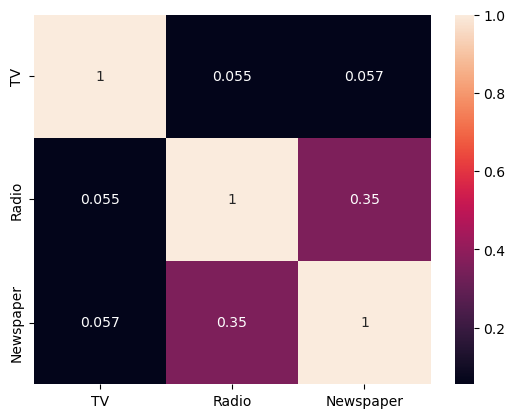

In [24]:
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

From the above analysis we can interpret that there is no multicollinearity between the independent features.

# 3) Normal Residual

> The residuals (the differences between the observed and predicted values) are assumed to be normally distributed.

C:\Users\sugas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


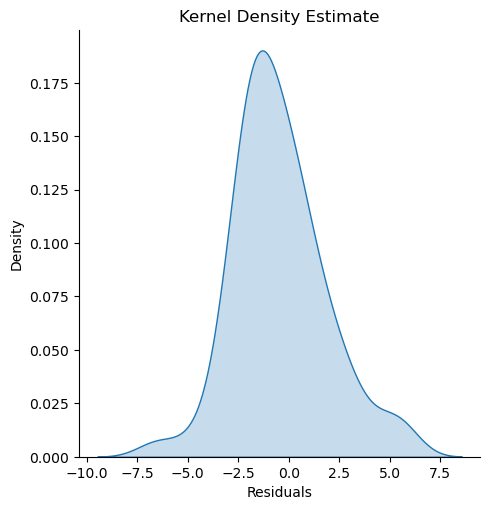

In [25]:
sns.displot(residual,kind="kde",fill=True)
plt.title("Kernel Density Estimate")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

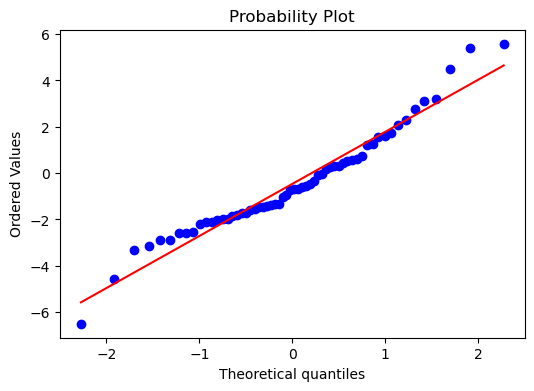

In [26]:
# QQ Plot
import scipy as sp

fig,ax =plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)

plt.show()

Based on the conducted analysis, it is apparent that the residuals demonstrate a normal distribution. This observation is supported by the examination of both Quantile-Quantile (QQ) plots and Kernel Density Estimation (KDE) plots.

# 4) Homoskedasticity

> The variance of the errors (residuals) should be constant across all levels of the independent variable. In other words, the spread of the residuals should be roughly constant as you move along the regression line.

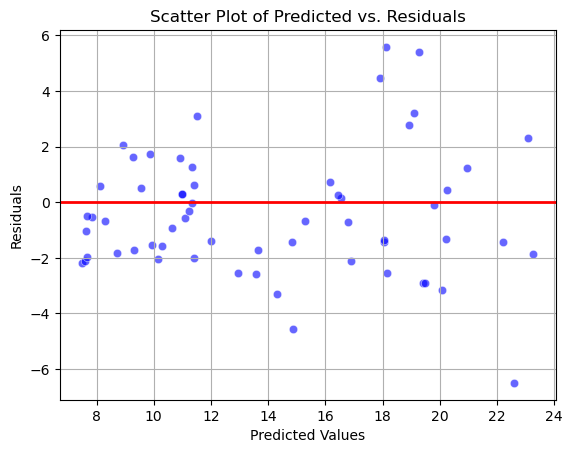

In [27]:
sns.scatterplot(x=y_pred, y=residual, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='-', linewidth=2)  # Add a horizontal line at y=0
plt.title("Scatter Plot of Predicted vs. Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)  
plt.show()

Based on the scatter plot, it is evident that the residuals exhibit a consistent variance across the range of predicted values, suggesting homoskedasticity in the model.

# 5) No Autocorrelation of Error

> This assumption states that the error terms (the difference between the actual values and the predicted values) are not correlated with each other. In simpler terms, the error at one observation should not be related to the error at any other observation.



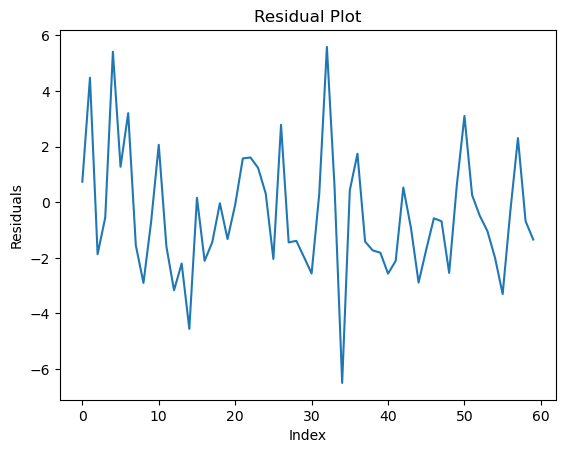

In [28]:
sns.lineplot(x=range(len(residual)), y=residual)

# Labeling axes
plt.xlabel("Index")
plt.ylabel("Residuals")

# Adding title
plt.title("Residual Plot")

# Show the plot
plt.show()

The absence of repetitive patterns observed in the analysis indicates that the residuals are not autocorrelated. This observation is further validated by utilizing the `sns.relplot` with the kind parameter set to "line" to visually inspect and confirm the absence of autocorrelation in the residuals.

# Interpretation of Linear Regression Results

In [29]:
# prediction on test data
y_pred

array([16.16109107, 17.92129084, 23.26769201,  7.84812269, 19.28667945,
       11.32465432, 19.09475735,  9.94829874, 19.4018327 , 16.8081427 ,
        8.93385339, 10.28827502, 20.0653348 ,  7.50266292, 14.85602084,
       16.53945177,  7.6068492 , 18.04192759, 11.3356213 , 20.22435596,
       19.79116038, 10.92435967,  9.29028013, 20.96462689, 10.99016153,
       10.14022083, 18.91380224, 14.84505386, 11.98815642,  7.66716757,
       18.16256433, 11.00112851, 18.11321294,  8.13326408, 22.59870643,
       20.26822387,  9.85507944, 22.21486224, 13.63320293,  8.71451385,
       13.56740107, 16.91232898,  9.56993804, 10.62276781, 19.48956852,
        9.30124711, 11.07789734, 15.28373293, 12.94228339, 11.39045618,
       11.49464246, 16.44074898,  7.68361804,  7.63426664, 11.39593967,
       14.30218851, 11.23143502, 23.09222038,  8.28131827, 18.04192759])

In [30]:
print(f"The slope of the best fit is {model.coef_}")
print(f"The intercept of the best fit is {model.intercept_}")

The slope of the best fit is [0.05483488]
The intercept of the best fit is 7.206554548173255


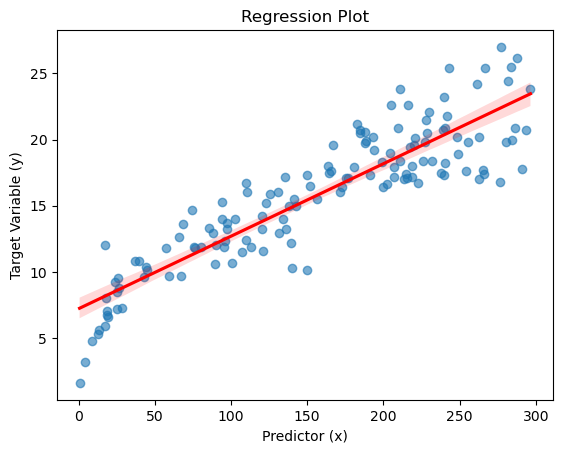

In [31]:
sns.regplot(x=x_train_reshaped, y=y_train_reshaped, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Regression Plot")
plt.xlabel("Predictor (x)")
plt.ylabel("Target Variable (y)")
plt.show()

The scatter points and the fitted regression line suggest a relationship between the predictor and the target variable.

In [32]:
# Example: Predict the sales for advertisement expenditure spent on T.V (e.g., 200)
prediction_single_value = model.predict([[200]])
print(f'Prediction for a single value (200): {prediction_single_value[0]}')

Prediction for a single value (200): 18.17353130722913


In [33]:
random_numbers = np.random.randint(100, 300, 10)  # Generating random numbers between 100 and 300

predictions_random_numbers = model.predict(np.array(random_numbers).reshape(-1, 1))
print('Predictions for 10 random numbers:\n')

for i in range(10):
    print(f'Random Number: {random_numbers[i]}, Prediction: {predictions_random_numbers[i]}')

Predictions for 10 random numbers:

Random Number: 205, Prediction: 18.447705726205527
Random Number: 276, Prediction: 22.340982475670362
Random Number: 238, Prediction: 20.257256891449746
Random Number: 189, Prediction: 17.570347585481056
Random Number: 237, Prediction: 20.202422007654466
Random Number: 173, Prediction: 16.692989444756584
Random Number: 146, Prediction: 15.212447582284042
Random Number: 231, Prediction: 19.87341270488279
Random Number: 191, Prediction: 17.680017353071612
Random Number: 281, Prediction: 22.61515689464676


# Regression Metrics

Commonly used regression performance metrics in scikit-learn include:

* Mean Absolute Error (MAE): Measures the average absolute differences between predicted and actual values.
* Mean Squared Error (MSE): Measures the average squared differences between predicted and actual values.
* Root Mean Squared Error (RMSE): The square root of the MSE; provides an interpretable scale.

These metrics collectively provide a comprehensive picture of how well a regression model is fitting the data, and they serve as valuable tools in the model development and evaluation process.

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [35]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(f"The Mean Absolute Error obtained is : {mae}")
print(f"The Mean Squared Error obtained is : {mse}")
print(f"The Root Mean Squared Error obtained is:{rmse}")

The Mean Absolute Error obtained is : 1.806912377664152
The Mean Squared Error obtained is : 5.179525402166653
The Root Mean Squared Error obtained is:2.2758570698017597


These metrics collectively offer insights into how well the regression model is performing. In this case, the relatively low values for MSE, MAE, and RMSE suggest that the model is making predictions with reasonable accuracy.

* R-squared (R2): Measures the proportion of variance explained by the model.

In [36]:
r2score=r2_score(y_test,y_pred)
print(f"The R square value obtained is : {r2score}")

The R square value obtained is : 0.814855389208679


# Conclusion

The (R-squared) value obtained for my regression model is 0.8149.

- **Interpretation:**
> The ( R^2) value measures the proportion of the variance in the dependent variable (target) that is explained by the independent variable(s) (predictor). In this case, approximately 81.49% of the variability in the target variable is accounted for by the predictor variable(s) in your model.

- **High ( R^2):**
> A high (R^2) value indicates that a significant portion of the variability in the target variable has been captured by the model. In our case, an \( R^2 \) of 0.8149 suggests a relatively good fit of the regression model to the data.


# Adjusted R2 Squared
> The adjusted R-squared is a modified version of the R-squared that takes into account the number of predictors (independent variables) in a regression model. While R-squared measures the proportion of variance in the dependent variable explained by the model, adjusted R-squared adjusts this value based on the number of predictors and the sample size.

In [37]:
adjusted_R2=1-(((1-r2score)*(x_test.shape[0]))/(x_test.shape[0]-1-1))
print(f"The Adjusted R square value obtained is : {adjusted_R2}")

The Adjusted R square value obtained is : 0.8084710922848403


Here the calculated adjusted R-squared value is approximately 0.808, indicating that about 80.8% of the variability in the dependent variable is explained by the model, adjusted for the number of predictors.